<a href="https://colab.research.google.com/github/Fentahun60/Fentahun/blob/main/HIVST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/HIVST_CSV_final.csv')
display(df.head())

/tmp/ipython-input-2403702427.py:3: DtypeWarning: Columns (15,26,27,29,34,35,36,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/HIVST_CSV_final.csv')


,caseid,Country,v001,Sample weight,Women's Age,Women's Age group,Residence,Level of Education,Religion,Numb_of_U5_child_in_HH,...,Distance_to_HF,Covered_by_Health_insurance,Current_marital_status,Employment_status,Condom_use_with_recent_sex,Had_STI_in_last_12_months,v766a,Number_of_sexual_partner_in_last_12_months,Ever_been_tested_for_HIV,Self_test_for_HIV
0,4 3 2,BF8,4,1206663,23,20-24,rural,no education,catholic,1,...,not a big problem,no,living with partner,no,no,no,0,1,no,never heard of hiv test kits
1,4 8 2,BF8,4,1206663,36,35-39,rural,no education,catholic,2,...,not a big problem,no,married,no,no,no,0,1,yes,never heard of hiv test kits
2,4 13 4,BF8,4,1206663,28,25-29,rural,no education,catholic,2,...,not a big problem,no,married,no,no,no,0,1,no,never heard of hiv test kits
3,4 17 2,BF8,4,1206663,40,40-44,rural,no education,catholic,1,...,big problem,no,married,no,no,no,0,1,no,never heard of hiv test kits
4,4 17 4,BF8,4,1206663,16,15-19,rural,secondary,catholic,1,...,not a big problem,no,never in union,no,NaN,no,0,0,no,never heard of hiv test kits


In [2]:
df.shape

(408808, 47)

In [3]:
def categorize_age(age):
    if 15 <= age <= 24:
        return '15-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif age > 34:
        return '>34'
    else:
        return None # Handle cases outside the specified ranges

df['Maternal Age'] = df['Women\'s Age'].apply(categorize_age)

display(df[['Women\'s Age', 'Maternal Age']].head())
display(df['Maternal Age'].value_counts())

,Women's Age,Maternal Age
0,23,15-24
1,36,>34
2,28,25-34
3,40,>34
4,16,15-24


,count
Maternal Age,
15-24,163436
>34,124500
25-34,120872


In [4]:
def recategorize_religion(religion):
    if religion == 'muslim':
        return 'Muslim'
    elif religion == 'catholic':
        return 'catholic'
    elif religion == 'protestant':
        return 'protestant'
    else:
        return 'Others'

df['Religion_Recategorized'] = df['Religion'].apply(recategorize_religion)

display(df[['Religion', 'Religion_Recategorized']].head())
display(df['Religion_Recategorized'].value_counts())

,Religion,Religion_Recategorized
0,catholic,catholic
1,catholic,catholic
2,catholic,catholic
3,catholic,catholic
4,catholic,catholic


,count
Religion_Recategorized,
Muslim,148762
Others,137672
catholic,92068
protestant,30306


In [5]:
display(df.columns)

Index(['caseid', 'Country', 'v001', 'Sample weight', 'Women's Age',
       'Women's Age group', 'Residence', 'Level of Education', 'Religion',
       'Numb_of_U5_child_in_HH', 'Sex_of Household_Head', 'v157', 'v158',
       'v159', 'Owns_Mobile_telephone', 'Had_smart_phone', 'Use_internet',
       'Wealth_Index', 'Total_Children_everborn', 'Currently_Pregnant',
       'Ever_had_terminated_pregnancy', 'Knowledg_any_contraceptive_method',
       'Current_contraceptive_method', 'Current_use_by_method',
       'Visited_HF_in_last_12_months', 'm14_1', 'm14_2', 'm14_3', 'm14_4',
       'm14_5', 'm14_6', 'm15_1', 'm15_2', 'm15_3', 'm15_4', 'm15_5', 'm15_6',
       'Distance_to_HF', 'Covered_by_Health_insurance',
       'Current_marital_status', 'Employment_status',
       'Condom_use_with_recent_sex', 'Had_STI_in_last_12_months', 'v766a',
       'Number_of_sexual_partner_in_last_12_months',
       'Ever_been_tested_for_HIV', 'Self_test_for_HIV', 'Maternal Age',
       'Religion_Recategorized'

In [6]:
def categorize_media_exposure(row):
    if row['v157'] == 'not at all' and row['v158'] == 'not at all' and row['v159'] == 'not at all':
        return 'No'
    else:
        return 'Yes'

df['media Exposure'] = df.apply(categorize_media_exposure, axis=1)

display(df[['v157', 'v158', 'v159', 'media Exposure']].head())
display(df['media Exposure'].value_counts())

,v157,v158,v159,media Exposure
0,not at all,not at all,not at all,No
1,not at all,at least once a week,not at all,Yes
2,not at all,not at all,not at all,No
3,not at all,not at all,not at all,No
4,not at all,at least once a week,not at all,Yes


,count
media Exposure,
Yes,280152
No,128656


In [7]:
display(df.shape)

(408808, 50)

In [8]:
import numpy as np

def recategorize_contraceptive_knowledge(knowledge):
    if pd.isna(knowledge):  # Check for missing values
        return None  # Or some other indicator for missing
    elif knowledge == 'knows modern method':
        return 'yes'
    else:
        return 'no'

df['Know modern contraceptive methods'] = df['Knowledg_any_contraceptive_method'].apply(recategorize_contraceptive_knowledge)

display(df[['Knowledg_any_contraceptive_method', 'Know modern contraceptive methods']].head())
display(df['Know modern contraceptive methods'].value_counts(dropna=False)) # Include NaN in counts

,Knowledg_any_contraceptive_method,Know modern contraceptive methods
0,knows modern method,yes
1,knows modern method,yes
2,knows modern method,yes
3,knows modern method,yes
4,knows no method,no


,count
Know modern contraceptive methods,
yes,382671
no,20299
None,5838


In [9]:
display(df.shape)

(408808, 51)

In [10]:
def recategorize_marital_status(status):
    if status in ['never in union', 'living with partner']:
        return 'single'
    elif status == 'married':
        return 'Married'
    else:
        return 'Divorced/Widowed'

df['Marital Status'] = df['Current_marital_status'].apply(recategorize_marital_status)

display(df[['Current_marital_status', 'Marital Status']].head())
display(df['Marital Status'].value_counts(dropna=False))

,Current_marital_status,Marital Status
0,living with partner,single
1,married,Married
2,married,Married
3,married,Married
4,never in union,single


,count
Marital Status,
Married,197033
single,170723
Divorced/Widowed,41052


In [11]:
def recategorize_sexual_partners(partners):
    # Convert to numeric, coercing errors to NaN
    partners_numeric = pd.to_numeric(partners, errors='coerce')
    if pd.isna(partners_numeric):
        return '>1'  # Assign '>1' for missing or invalid data
    elif partners_numeric <= 1:
        return '<=1'
    elif partners_numeric > 1:
        return '>1'
    else:
        return '>1' # Handle any other unexpected cases by assigning '>1'

df['Number of sexual Partner'] = df['Number_of_sexual_partner_in_last_12_months'].apply(recategorize_sexual_partners)

display(df[['Number_of_sexual_partner_in_last_12_months', 'Number of sexual Partner']].head())
display(df['Number of sexual Partner'].value_counts(dropna=False))

,Number_of_sexual_partner_in_last_12_months,Number of sexual Partner
0,1,<=1
1,1,<=1
2,1,<=1
3,1,<=1
4,0,<=1


,count
Number of sexual Partner,
<=1,364749
>1,44059


In [12]:
display(df.shape)

(408808, 53)

In [13]:
display(df['Self_test_for_HIV'].value_counts(dropna=False))

,count
Self_test_for_HIV,
never heard of hiv test kits,297646
NaN,61051
knows test kits but never tested with them,39216
has tested with hiv test kits,9765
knows test kits un-known if tested,1130


In [14]:
def categorize_hivst(status):
    if pd.isna(status):
        return np.nan # Keep NaN values as NaN
    elif status == 'has tested with hiv test kits':
        return 'know and use HIVST'
    else:
        return 'do not know/use HIVST'

df['HIVST'] = df['Self_test_for_HIV'].apply(categorize_hivst)

display(df[['Self_test_for_HIV', 'HIVST']].head())
display(df['HIVST'].value_counts(dropna=False)) # Include NaN in counts

,Self_test_for_HIV,HIVST
0,never heard of hiv test kits,do not know/use HIVST
1,never heard of hiv test kits,do not know/use HIVST
2,never heard of hiv test kits,do not know/use HIVST
3,never heard of hiv test kits,do not know/use HIVST
4,never heard of hiv test kits,do not know/use HIVST


,count
HIVST,
do not know/use HIVST,337992
NaN,61051
know and use HIVST,9765


In [15]:
display(df.columns)

Index(['caseid', 'Country', 'v001', 'Sample weight', 'Women's Age',
       'Women's Age group', 'Residence', 'Level of Education', 'Religion',
       'Numb_of_U5_child_in_HH', 'Sex_of Household_Head', 'v157', 'v158',
       'v159', 'Owns_Mobile_telephone', 'Had_smart_phone', 'Use_internet',
       'Wealth_Index', 'Total_Children_everborn', 'Currently_Pregnant',
       'Ever_had_terminated_pregnancy', 'Knowledg_any_contraceptive_method',
       'Current_contraceptive_method', 'Current_use_by_method',
       'Visited_HF_in_last_12_months', 'm14_1', 'm14_2', 'm14_3', 'm14_4',
       'm14_5', 'm14_6', 'm15_1', 'm15_2', 'm15_3', 'm15_4', 'm15_5', 'm15_6',
       'Distance_to_HF', 'Covered_by_Health_insurance',
       'Current_marital_status', 'Employment_status',
       'Condom_use_with_recent_sex', 'Had_STI_in_last_12_months', 'v766a',
       'Number_of_sexual_partner_in_last_12_months',
       'Ever_been_tested_for_HIV', 'Self_test_for_HIV', 'Maternal Age',
       'Religion_Recategorized'

In [16]:
selected_columns = ['caseid', 'Country', 'v001', 'Sample weight', 'Maternal Age','Residence', 'Sex_of Household_Head','Religion_Recategorized',
                    'Level of Education', 'Marital Status','Employment_status','media Exposure', 'Covered_by_Health_insurance', 'Wealth_Index',
                    'Owns_Mobile_telephone', 'Use_internet','Currently_Pregnant', 'Ever_had_terminated_pregnancy', 'Visited_HF_in_last_12_months',
                    'Distance_to_HF', 'Condom_use_with_recent_sex', 'Had_STI_in_last_12_months', 'Ever_been_tested_for_HIV',
                     'Know modern contraceptive methods', 'Number of sexual Partner', 'HIVST']

df_selected = df[selected_columns]

display(df_selected.head())
display(df_selected.shape)

,caseid,Country,v001,Sample weight,Maternal Age,Residence,Sex_of Household_Head,Religion_Recategorized,Level of Education,Marital Status,...,Currently_Pregnant,Ever_had_terminated_pregnancy,Visited_HF_in_last_12_months,Distance_to_HF,Condom_use_with_recent_sex,Had_STI_in_last_12_months,Ever_been_tested_for_HIV,Know modern contraceptive methods,Number of sexual Partner,HIVST
0,4 3 2,BF8,4,1206663,15-24,rural,male,catholic,no education,single,...,yes,no,yes,not a big problem,no,no,no,yes,<=1,do not know/use HIVST
1,4 8 2,BF8,4,1206663,>34,rural,male,catholic,no education,Married,...,no or unsure,no,yes,not a big problem,no,no,yes,yes,<=1,do not know/use HIVST
2,4 13 4,BF8,4,1206663,25-34,rural,male,catholic,no education,Married,...,no or unsure,no,yes,not a big problem,no,no,no,yes,<=1,do not know/use HIVST
3,4 17 2,BF8,4,1206663,>34,rural,male,catholic,no education,Married,...,no or unsure,no,yes,big problem,no,no,no,yes,<=1,do not know/use HIVST
4,4 17 4,BF8,4,1206663,15-24,rural,male,catholic,secondary,single,...,no or unsure,no,yes,not a big problem,NaN,no,no,no,<=1,do not know/use HIVST


(408808, 26)

In [17]:
for col in df_selected.columns:
    if df_selected[col].dtype == 'object' or df_selected[col].dtype == 'category':
        print(f"Categories for '{col}':")
        display(df_selected[col].value_counts(dropna=False))
    else:
        print(f"Column '{col}' has data type: {df_selected[col].dtype}")

Categories for 'caseid':


,count
caseid,
194 1 2,12
45 11 2,9
109 1 2,9
153 7 2,8
218 1 2,8
...,...
35 21 12,1
35 21 10,1
35 21 8,1


Categories for 'Country':


,count
Country,
KE8,32156
CD8,27583
MW7,24562
ML8,20354
MD7,18869
UG7,18506
BF8,17659
BU7,17269
SN8,16583


Column 'v001' has data type: int64
Column 'Sample weight' has data type: int64
Categories for 'Maternal Age':


,count
Maternal Age,
15-24,163436
>34,124500
25-34,120872


Categories for 'Residence':


,count
Residence,
rural,252029
urban,156779


Categories for 'Sex_of Household_Head':


,count
Sex_of Household_Head,
male,288255
female,120553


Categories for 'Religion_Recategorized':


,count
Religion_Recategorized,
Muslim,148762
Others,137672
catholic,92068
protestant,30306


Categories for 'Level of Education':


,count
Level of Education,
secondary,143663
primary,130546
no education,113390
higher,21209


Categories for 'Marital Status':


,count
Marital Status,
Married,197033
single,170723
Divorced/Widowed,41052


Categories for 'Employment_status':


,count
Employment_status,
yes,226011
no,178109
NaN,4688


Categories for 'media Exposure':


,count
media Exposure,
Yes,280152
No,128656


Categories for 'Covered_by_Health_insurance':


,count
Covered_by_Health_insurance,
no,317308
yes,47589
NaN,43911


Categories for 'Wealth_Index':


,count
Wealth_Index,
richest,83870
poorest,82748
middle,82122
richer,81675
poorer,78393


Categories for 'Owns_Mobile_telephone':


,count
Owns_Mobile_telephone,
yes,232477
no,176331


Categories for 'Use_internet':


,count
Use_internet,
never,305091
"yes, last 12 months",95564
"yes, before last 12 months",8153


Categories for 'Currently_Pregnant':


,count
Currently_Pregnant,
no or unsure,371637
yes,31333
NaN,5838


Categories for 'Ever_had_terminated_pregnancy':


,count
Ever_had_terminated_pregnancy,
no,347273
yes,55697
NaN,5838


Categories for 'Visited_HF_in_last_12_months':


,count
Visited_HF_in_last_12_months,
yes,206773
no,174988
NaN,27047


Categories for 'Distance_to_HF':


,count
Distance_to_HF,
not a big problem,242854
big problem,138944
NaN,27010


Categories for 'Condom_use_with_recent_sex':


,count
Condom_use_with_recent_sex,
no,257838
NaN,126726
yes,24244


Categories for 'Had_STI_in_last_12_months':


,count
Had_STI_in_last_12_months,
no,363974
NaN,22644
yes,21677
don't know,513


Categories for 'Ever_been_tested_for_HIV':


,count
Ever_been_tested_for_HIV,
yes,208469
no,180361
NaN,18407
.a,1571


Categories for 'Know modern contraceptive methods':


,count
Know modern contraceptive methods,
yes,382671
no,20299
None,5838


Categories for 'Number of sexual Partner':


,count
Number of sexual Partner,
<=1,364749
>1,44059


Categories for 'HIVST':


,count
HIVST,
do not know/use HIVST,337992
NaN,61051
know and use HIVST,9765


In [18]:
missing_values = df_selected.isnull().sum()
missing_percentage = (missing_values / len(df_selected)) * 100
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

,0
Condom_use_with_recent_sex,30.998904
HIVST,14.933905
Covered_by_Health_insurance,10.741228
Visited_HF_in_last_12_months,6.616064
Distance_to_HF,6.607014
Had_STI_in_last_12_months,5.539031
Ever_been_tested_for_HIV,4.502603
Ever_had_terminated_pregnancy,1.428054
Currently_Pregnant,1.428054
Know modern contraceptive methods,1.428054


In [19]:
selected_columns = ['Country', 'Maternal Age','Residence', 'Sex_of Household_Head','Religion_Recategorized',
                    'Level of Education', 'Marital Status','Employment_status','media Exposure',
                    'Covered_by_Health_insurance', 'Wealth_Index', 'Owns_Mobile_telephone', 'Use_internet',
                    'Currently_Pregnant', 'Ever_had_terminated_pregnancy', 'Visited_HF_in_last_12_months',
                    'Distance_to_HF', 'Had_STI_in_last_12_months', 'Ever_been_tested_for_HIV',
                    'Know modern contraceptive methods', 'Number of sexual Partner', 'HIVST']

df_final = df[selected_columns]

display(df_final.head())
display(df_final.shape)

,Country,Maternal Age,Residence,Sex_of Household_Head,Religion_Recategorized,Level of Education,Marital Status,Employment_status,media Exposure,Covered_by_Health_insurance,...,Use_internet,Currently_Pregnant,Ever_had_terminated_pregnancy,Visited_HF_in_last_12_months,Distance_to_HF,Had_STI_in_last_12_months,Ever_been_tested_for_HIV,Know modern contraceptive methods,Number of sexual Partner,HIVST
0,BF8,15-24,rural,male,catholic,no education,single,no,No,no,...,never,yes,no,yes,not a big problem,no,no,yes,<=1,do not know/use HIVST
1,BF8,>34,rural,male,catholic,no education,Married,no,Yes,no,...,never,no or unsure,no,yes,not a big problem,no,yes,yes,<=1,do not know/use HIVST
2,BF8,25-34,rural,male,catholic,no education,Married,no,No,no,...,never,no or unsure,no,yes,not a big problem,no,no,yes,<=1,do not know/use HIVST
3,BF8,>34,rural,male,catholic,no education,Married,no,No,no,...,never,no or unsure,no,yes,big problem,no,no,yes,<=1,do not know/use HIVST
4,BF8,15-24,rural,male,catholic,secondary,single,no,Yes,no,...,never,no or unsure,no,yes,not a big problem,no,no,no,<=1,do not know/use HIVST


(408808, 22)

In [20]:
display(df_final['HIVST'].value_counts(dropna=False))

,count
HIVST,
do not know/use HIVST,337992
NaN,61051
know and use HIVST,9765


In [21]:
df_cleaned = df_final.dropna(subset=['HIVST'])
display(df_cleaned.shape)

(347757, 22)

In [22]:
cross_tab = pd.crosstab(df_cleaned['Country'], df_cleaned['HIVST'])
display(cross_tab)

HIVST,do not know/use HIVST,know and use HIVST
Country,,
BF8,17611,48
BJ7,6966,106
BU7,16442,41
CD8,23774,183
CI8,12799,135
CM7,13959,292
GA7,7723,36
GH8,13603,377
GM7,11563,0


In [23]:
country_names = {
    'BF8': 'Burkina Faso',
    'BJ7': 'Benin',
    'BU7': 'Burundi',
    'CD8': 'Democratic Republic of the Congo',
    'CI8': 'Côte d’Ivoire',
    'CM7': 'Cameroon',
    'GA7': 'Gabon',
    'GH8': 'Ghana',
    'GM7': 'Gambia',
    'GN7': 'Guinea',
    'KE8': 'Kenya',
    'LB7': 'Liberia',
    'LS8': 'Lesotho',
    'MD7': 'Madagascar',
    'ML8': 'Mali',
    'MR7': 'Mauritania',
    'MW7': 'Malawi',
    'MZ8': 'Mozambique',
    'RW7': 'Rwanda',
    'SL7': 'Sierra Leone',
    'SN8': 'Senegal',
    'TZ8': 'Tanzania',
    'UG7': 'Uganda',
    'ZA7': 'South Africa',
    'ZM7': 'Zambia',
    'ZW7': 'Zimbabwe'
}

df_cleaned['Country'] = df_cleaned['Country'].replace(country_names)

display(df_cleaned['Country'].value_counts())

/tmp/ipython-input-2448993010.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].replace(country_names)


,count
Country,
Malawi,24072
Democratic Republic of the Congo,23957
Uganda,18433
Burkina Faso,17659
Kenya,16781
Burundi,16483
Tanzania,15254
Madagascar,14942
Mali,14758


In [24]:
df_cleaned. head()

,Country,Maternal Age,Residence,Sex_of Household_Head,Religion_Recategorized,Level of Education,Marital Status,Employment_status,media Exposure,Covered_by_Health_insurance,...,Use_internet,Currently_Pregnant,Ever_had_terminated_pregnancy,Visited_HF_in_last_12_months,Distance_to_HF,Had_STI_in_last_12_months,Ever_been_tested_for_HIV,Know modern contraceptive methods,Number of sexual Partner,HIVST
0,Burkina Faso,15-24,rural,male,catholic,no education,single,no,No,no,...,never,yes,no,yes,not a big problem,no,no,yes,<=1,do not know/use HIVST
1,Burkina Faso,>34,rural,male,catholic,no education,Married,no,Yes,no,...,never,no or unsure,no,yes,not a big problem,no,yes,yes,<=1,do not know/use HIVST
2,Burkina Faso,25-34,rural,male,catholic,no education,Married,no,No,no,...,never,no or unsure,no,yes,not a big problem,no,no,yes,<=1,do not know/use HIVST
3,Burkina Faso,>34,rural,male,catholic,no education,Married,no,No,no,...,never,no or unsure,no,yes,big problem,no,no,yes,<=1,do not know/use HIVST
4,Burkina Faso,15-24,rural,male,catholic,secondary,single,no,Yes,no,...,never,no or unsure,no,yes,not a big problem,no,no,no,<=1,do not know/use HIVST


In [25]:
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

,0
Covered_by_Health_insurance,6.339484
Visited_HF_in_last_12_months,2.252722
Distance_to_HF,1.513988
Had_STI_in_last_12_months,1.061086
Currently_Pregnant,0.746211
Ever_had_terminated_pregnancy,0.746211
Know modern contraceptive methods,0.746211
Employment_status,0.428748


In [26]:
columns_to_impute = [
    'Covered_by_Health_insurance',
    'Visited_HF_in_last_12_months',
    'Distance_to_HF',
    'Had_STI_in_last_12_months',
    'Currently_Pregnant',
    'Ever_had_terminated_pregnancy',
    'Know modern contraceptive methods',
    'Employment_status'
]

for col in columns_to_impute:
    if col in df_cleaned.columns:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)

# Display the missing values again to confirm imputation
missing_values_after_imputation = df_cleaned.isnull().sum()
display(missing_values_after_imputation[missing_values_after_imputation > 0].sort_values(ascending=False))

/tmp/ipython-input-2979098406.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-2979098406.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(mode_value, inplace=True)


,0


In [27]:
missing_values_after_imputation = df_cleaned.isnull().sum()
display(missing_values_after_imputation[missing_values_after_imputation > 0].sort_values(ascending=False))

,0


In [28]:
df_cleaned.shape

(347757, 22)

In [29]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or df_cleaned[col].dtype == 'category':
        print(f"Categories for '{col}':")
        display(df_cleaned[col].value_counts(dropna=False))
    else:
        print(f"Column '{col}' has data type: {df_cleaned[col].dtype}")

Categories for 'Country':


,count
Country,
Malawi,24072
Democratic Republic of the Congo,23957
Uganda,18433
Burkina Faso,17659
Kenya,16781
Burundi,16483
Tanzania,15254
Madagascar,14942
Mali,14758


Categories for 'Maternal Age':


,count
Maternal Age,
15-24,139143
>34,104613
25-34,104001


Categories for 'Residence':


,count
Residence,
rural,211225
urban,136532


Categories for 'Sex_of Household_Head':


,count
Sex_of Household_Head,
male,245074
female,102683


Categories for 'Religion_Recategorized':


,count
Religion_Recategorized,
Muslim,130674
Others,114057
catholic,81608
protestant,21418


Categories for 'Level of Education':


,count
Level of Education,
secondary,126042
primary,113748
no education,90299
higher,17668


Categories for 'Marital Status':


,count
Marital Status,
Married,166801
single,148395
Divorced/Widowed,32561


Categories for 'Employment_status':


,count
Employment_status,
yes,197809
no,149948


Categories for 'media Exposure':


,count
media Exposure,
Yes,242285
No,105472


Categories for 'Covered_by_Health_insurance':


,count
Covered_by_Health_insurance,
no,302626
yes,45131


Categories for 'Wealth_Index':


,count
Wealth_Index,
richest,74737
richer,71134
middle,70049
poorest,66117
poorer,65720


Categories for 'Owns_Mobile_telephone':


,count
Owns_Mobile_telephone,
yes,199451
no,148306


Categories for 'Use_internet':


,count
Use_internet,
never,257309
"yes, last 12 months",83410
"yes, before last 12 months",7038


Categories for 'Currently_Pregnant':


,count
Currently_Pregnant,
no or unsure,320931
yes,26826


Categories for 'Ever_had_terminated_pregnancy':


,count
Ever_had_terminated_pregnancy,
no,298522
yes,49235


Categories for 'Visited_HF_in_last_12_months':


,count
Visited_HF_in_last_12_months,
yes,198291
no,149466


Categories for 'Distance_to_HF':


,count
Distance_to_HF,
not a big problem,225462
big problem,122295


Categories for 'Had_STI_in_last_12_months':


,count
Had_STI_in_last_12_months,
no,326286
yes,20977
don't know,494


Categories for 'Ever_been_tested_for_HIV':


,count
Ever_been_tested_for_HIV,
yes,201589
no,145147
.a,1021


Categories for 'Know modern contraceptive methods':


,count
Know modern contraceptive methods,
yes,336199
no,11558


Categories for 'Number of sexual Partner':


,count
Number of sexual Partner,
<=1,324937
>1,22820


Categories for 'HIVST':


,count
HIVST,
do not know/use HIVST,337992
know and use HIVST,9765


In [30]:
display(df_cleaned.columns)

Index(['Country', 'Maternal Age', 'Residence', 'Sex_of Household_Head',
       'Religion_Recategorized', 'Level of Education', 'Marital Status',
       'Employment_status', 'media Exposure', 'Covered_by_Health_insurance',
       'Wealth_Index', 'Owns_Mobile_telephone', 'Use_internet',
       'Currently_Pregnant', 'Ever_had_terminated_pregnancy',
       'Visited_HF_in_last_12_months', 'Distance_to_HF',
       'Had_STI_in_last_12_months', 'Ever_been_tested_for_HIV',
       'Know modern contraceptive methods', 'Number of sexual Partner',
       'HIVST'],
      dtype='object')

In [31]:
cross_tab_country_hivst = pd.crosstab(df_cleaned['Country'], df_cleaned['HIVST'])
# Add a 'Total' column
cross_tab_country_hivst['Total'] = cross_tab_country_hivst['do not know/use HIVST'] + cross_tab_country_hivst['know and use HIVST']
cross_tab_country_hivst.to_csv('country_hivst_crosstab.csv')
display(cross_tab_country_hivst)

HIVST,do not know/use HIVST,know and use HIVST,Total
Country,,,
Benin,6966,106,7072
Burkina Faso,17611,48,17659
Burundi,16442,41,16483
Cameroon,13959,292,14251
Côte d’Ivoire,12799,135,12934
Democratic Republic of the Congo,23774,183,23957
Gabon,7723,36,7759
Gambia,11563,0,11563
Ghana,13603,377,13980


In [32]:
df_cleaned['Ever_been_tested_for_HIV'] = df_cleaned['Ever_been_tested_for_HIV'].replace('.a', 'no')
display(df_cleaned['Ever_been_tested_for_HIV'].value_counts(dropna=False))

/tmp/ipython-input-1353943928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Ever_been_tested_for_HIV'] = df_cleaned['Ever_been_tested_for_HIV'].replace('.a', 'no')


,count
Ever_been_tested_for_HIV,
yes,201589
no,146168


In [33]:
def recategorize_internet_use(use_status):
    if use_status in ['yes, before last 12 months', 'yes, last 12 months']:
        return 'yes'
    elif use_status == 'never':
        return 'no'
    else:
        return None # Handle any unexpected values

df_cleaned['Internet Use'] = df_cleaned['Use_internet'].apply(recategorize_internet_use)

display(df_cleaned[['Use_internet', 'Internet Use']].head())
display(df_cleaned['Internet Use'].value_counts(dropna=False))

/tmp/ipython-input-2479154903.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Internet Use'] = df_cleaned['Use_internet'].apply(recategorize_internet_use)


,Use_internet,Internet Use
0,never,no
1,never,no
2,never,no
3,never,no
4,never,no


,count
Internet Use,
no,257309
yes,90448


In [34]:
def recategorize_sti(sti_status):
    if sti_status == 'yes':
        return 'yes'
    else:
        return 'no' # Group 'don't know', 'no', and any other values into 'no'

df_cleaned['Had_STI_in_last_12_months'] = df_cleaned['Had_STI_in_last_12_months'].apply(recategorize_sti)

display(df_cleaned['Had_STI_in_last_12_months'].value_counts(dropna=False))

/tmp/ipython-input-832422912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Had_STI_in_last_12_months'] = df_cleaned['Had_STI_in_last_12_months'].apply(recategorize_sti)


,count
Had_STI_in_last_12_months,
no,326780
yes,20977


In [35]:
def recategorize_internet_use(use_status):
    if use_status == 'never':
        return 'no'
    else:
        return 'yes' # Group 'yes, before last 12 months' and 'yes, last 12 months' and any other values into 'yes'

df_cleaned['Internet Use'] = df_cleaned['Use_internet'].apply(recategorize_internet_use)

# Drop the original 'Use_internet' column
df_cleaned = df_cleaned.drop('Use_internet', axis=1)

display(df_cleaned[['Internet Use']].head())
display(df_cleaned['Internet Use'].value_counts(dropna=False))

/tmp/ipython-input-1400541076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Internet Use'] = df_cleaned['Use_internet'].apply(recategorize_internet_use)


,Internet Use
0,no
1,no
2,no
3,no
4,no


,count
Internet Use,
no,257309
yes,90448


In [36]:
display(df_cleaned.columns)

Index(['Country', 'Maternal Age', 'Residence', 'Sex_of Household_Head',
       'Religion_Recategorized', 'Level of Education', 'Marital Status',
       'Employment_status', 'media Exposure', 'Covered_by_Health_insurance',
       'Wealth_Index', 'Owns_Mobile_telephone', 'Currently_Pregnant',
       'Ever_had_terminated_pregnancy', 'Visited_HF_in_last_12_months',
       'Distance_to_HF', 'Had_STI_in_last_12_months',
       'Ever_been_tested_for_HIV', 'Know modern contraceptive methods',
       'Number of sexual Partner', 'HIVST', 'Internet Use'],
      dtype='object')

In [37]:
variables_to_crosstab = [
    'Maternal Age',
    'Residence',
    'Sex_of Household_Head',
    'Religion_Recategorized',
    'Level of Education',
    'Marital Status',
    'Employment_status',
    'media Exposure',
    'Covered_by_Health_insurance',
    'Wealth_Index',
    'Owns_Mobile_telephone',
    'Internet Use',
    'Currently_Pregnant',
    'Ever_had_terminated_pregnancy',
    'Visited_HF_in_last_12_months',
    'Distance_to_HF',
    'Had_STI_in_last_12_months',
    'Ever_been_tested_for_HIV',
    'Know modern contraceptive methods',
    'Number of sexual Partner'
]

# Create a list to store individual crosstabs
crosstab_list = []

for var in variables_to_crosstab:
    cross_tab = pd.crosstab(df_cleaned[var], df_cleaned['HIVST'])
    # Add a level to the index to indicate the original variable
    cross_tab.index = pd.MultiIndex.from_product([[var], cross_tab.index])
    crosstab_list.append(cross_tab)

# Concatenate all crosstabs into a single DataFrame
all_crosstabs = pd.concat(crosstab_list)

# Save the combined crosstab to a CSV file
all_crosstabs.to_csv('all_variables_hivst_crosstabs.csv')

display(all_crosstabs)

HIVST                                                do not know/use HIVST  \
Maternal Age                      15-24                             135823   
                                  25-34                             100105   
                                  >34                               102064   
Residence                         rural                             206608   
                                  urban                             131384   
Sex_of Household_Head             female                             98522   
                                  male                              239470   
Religion_Recategorized            Muslim                            127740   
                                  Others                            110400   
                                  catholic                           79098   
                                  protestant                         20754   
Level of Education                higher                             15238   
                                  no education                       89610   
                                  primary                           111789   
                                  secondary                         121355   
Marital Status                    Divorced/Widowed                   31391   
                                  Married                           162214   
                                  single                            144387   
Employment_status                 no                                145782   
                                  yes                               192210   
media Exposure                    No                                103656   
                                  Yes                               234336   
Covered_by_Health_insurance       no                                294072   
                                  yes                                43920   
Wealth_Index                      middle                             68479   
                                  poorer                             64418   
                                  poorest                            65000   
                                  richer                             68888   
                                  richest                            71207   
Owns_Mobile_telephone             no                                146793   
                                  yes                               191199   
Internet Use                      no                                253942   
                                  yes                                84050   
Currently_Pregnant                no or unsure                      311768   
                                  yes                                26224   
Ever_had_terminated_pregnancy     no                                290166   
                                  yes                                47826   
Visited_HF_in_last_12_months      no                                146340   
                                  yes                               191652   
Distance_to_HF                    big problem                       120081   
                                  not a big problem                 217911   
Had_STI_in_last_12_months         no                                317938   
                                  yes                                20054   
Ever_been_tested_for_HIV          no                                145719   
                                  yes                               192273   
Know modern contraceptive methods no                                 11530   
                                  yes                               326462   
Number of sexual Partner          <=1                               316133   
                                  >1                                 21859   

HIVST                                                know and use HIVST  
Maternal Age             

In [38]:
df_cleaned.shape

(347757, 22)

In [39]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object' or df_cleaned[col].dtype == 'category':
        print(f"Categories for '{col}':")
        display(df_cleaned[col].value_counts(dropna=False))

Categories for 'Country':


,count
Country,
Malawi,24072
Democratic Republic of the Congo,23957
Uganda,18433
Burkina Faso,17659
Kenya,16781
Burundi,16483
Tanzania,15254
Madagascar,14942
Mali,14758


Categories for 'Maternal Age':


,count
Maternal Age,
15-24,139143
>34,104613
25-34,104001


Categories for 'Residence':


,count
Residence,
rural,211225
urban,136532


Categories for 'Sex_of Household_Head':


,count
Sex_of Household_Head,
male,245074
female,102683


Categories for 'Religion_Recategorized':


,count
Religion_Recategorized,
Muslim,130674
Others,114057
catholic,81608
protestant,21418


Categories for 'Level of Education':


,count
Level of Education,
secondary,126042
primary,113748
no education,90299
higher,17668


Categories for 'Marital Status':


,count
Marital Status,
Married,166801
single,148395
Divorced/Widowed,32561


Categories for 'Employment_status':


,count
Employment_status,
yes,197809
no,149948


Categories for 'media Exposure':


,count
media Exposure,
Yes,242285
No,105472


Categories for 'Covered_by_Health_insurance':


,count
Covered_by_Health_insurance,
no,302626
yes,45131


Categories for 'Wealth_Index':


,count
Wealth_Index,
richest,74737
richer,71134
middle,70049
poorest,66117
poorer,65720


Categories for 'Owns_Mobile_telephone':


,count
Owns_Mobile_telephone,
yes,199451
no,148306


Categories for 'Currently_Pregnant':


,count
Currently_Pregnant,
no or unsure,320931
yes,26826


Categories for 'Ever_had_terminated_pregnancy':


,count
Ever_had_terminated_pregnancy,
no,298522
yes,49235


Categories for 'Visited_HF_in_last_12_months':


,count
Visited_HF_in_last_12_months,
yes,198291
no,149466


Categories for 'Distance_to_HF':


,count
Distance_to_HF,
not a big problem,225462
big problem,122295


Categories for 'Had_STI_in_last_12_months':


,count
Had_STI_in_last_12_months,
no,326780
yes,20977


Categories for 'Ever_been_tested_for_HIV':


,count
Ever_been_tested_for_HIV,
yes,201589
no,146168


Categories for 'Know modern contraceptive methods':


,count
Know modern contraceptive methods,
yes,336199
no,11558


Categories for 'Number of sexual Partner':


,count
Number of sexual Partner,
<=1,324937
>1,22820


Categories for 'HIVST':


,count
HIVST,
do not know/use HIVST,337992
know and use HIVST,9765


Categories for 'Internet Use':


,count
Internet Use,
no,257309
yes,90448


In [40]:
# Recategorize 'media Exposure'
def recategorize_media_exposure_binary(status):
    if status == 'Yes':
        return 'yes'
    else:
        return 'no'

df_cleaned['media Exposure'] = df_cleaned['media Exposure'].apply(recategorize_media_exposure_binary)
print("Value counts for 'media Exposure' after recategorization:")
display(df_cleaned['media Exposure'].value_counts(dropna=False))

# Recategorize 'Currently_Pregnant'
def recategorize_pregnant_binary(status):
    if status == 'yes':
        return 'yes'
    else:
        return 'no' # Includes 'no or unsure'

df_cleaned['Currently_Pregnant'] = df_cleaned['Currently_Pregnant'].apply(recategorize_pregnant_binary)
print("\nValue counts for 'Currently_Pregnant' after recategorization:")
display(df_cleaned['Currently_Pregnant'].value_counts(dropna=False))

# Recategorize 'Distance_to_HF'
def recategorize_distance_binary(status):
    if status == 'not a big problem':
        return 'yes' # Assuming 'not a big problem' implies accessible/yes
    else:
        return 'no' # Includes 'big problem'

df_cleaned['Distance_to_HF'] = df_cleaned['Distance_to_HF'].apply(recategorize_distance_binary)
print("\nValue counts for 'Distance_to_HF' after recategorization:")
display(df_cleaned['Distance_to_HF'].value_counts(dropna=False))

# Recategorize 'HIVST' (already done in previous steps, but confirming the structure)
def recategorize_hivst_binary(status):
    if status == 'know and use HIVST':
        return 'yes'
    else:
        return 'no' # Includes 'do not know/use HIVST'

df_cleaned['HIVST'] = df_cleaned['HIVST'].apply(recategorize_hivst_binary)
print("\nValue counts for 'HIVST' after recategorization:")
display(df_cleaned['HIVST'].value_counts(dropna=False))

Value counts for 'media Exposure' after recategorization:


,count
media Exposure,
yes,242285
no,105472



Value counts for 'Currently_Pregnant' after recategorization:


,count
Currently_Pregnant,
no,320931
yes,26826



Value counts for 'Distance_to_HF' after recategorization:


,count
Distance_to_HF,
yes,225462
no,122295



Value counts for 'HIVST' after recategorization:


,count
HIVST,
no,337992
yes,9765


In [41]:
display(df_cleaned.columns)

Index(['Country', 'Maternal Age', 'Residence', 'Sex_of Household_Head',
       'Religion_Recategorized', 'Level of Education', 'Marital Status',
       'Employment_status', 'media Exposure', 'Covered_by_Health_insurance',
       'Wealth_Index', 'Owns_Mobile_telephone', 'Currently_Pregnant',
       'Ever_had_terminated_pregnancy', 'Visited_HF_in_last_12_months',
       'Distance_to_HF', 'Had_STI_in_last_12_months',
       'Ever_been_tested_for_HIV', 'Know modern contraceptive methods',
       'Number of sexual Partner', 'HIVST', 'Internet Use'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np

# Define variables for ordinal and nominal encoding based on user's request
ordinal_cols = [
    'Maternal Age',
    'Religion_Recategorized',
    'Level of Education',
    'Wealth_Index',
    'Marital Status'
]

nominal_cols = [
    'Residence',
    'Sex_of Household_Head',
    'media Exposure',
    'Covered_by_Health_insurance',
    'Owns_Mobile_telephone',
    'Currently_Pregnant',
    'Ever_had_terminated_pregnancy',
    'Employment_status',
    'Visited_HF_in_last_12_months',
    'Distance_to_HF',
    'Had_STI_in_last_12_months',
    'Ever_been_tested_for_HIV',
    'Know modern contraceptive methods',
    'Number of sexual Partner',
    'HIVST', # Assuming HIVST is to be nominally encoded (binary)
    'Internet Use'
]

# Ensure no overlap and all relevant categorical columns are covered (excluding Country)
all_specified_cols = ordinal_cols + nominal_cols
all_categorical_in_cleaned = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify any categorical columns in df_cleaned not in the specified lists (excluding Country)
other_categorical_cols = [col for col in all_categorical_in_cleaned if col not in all_specified_cols and col != 'Country']

if other_categorical_cols:
    print(f"Warning: The following categorical columns in df_cleaned are not in the specified lists: {other_categorical_cols}. They will not be encoded in this step.")

# Create a copy to avoid modifying the original df_cleaned
df_encoded_final = df_cleaned.copy()

# --- 1. Ordinal Encoding ---

# Define category orders for ordinal variables (need to confirm these based on data and user intent)
# Using observed value counts to define a plausible order for now, or based on previous interactions
ordinal_mapping = {
    'Maternal Age': ['15-24', '25-34', '>34'],
    # Religion_Recategorized: Based on value counts, no obvious ordinality. Reconsidering this for ordinal encoding.
    # Let's assume the user has a specific order in mind, but without it, ordinal encoding might not be appropriate.
    # For now, let's attempt encoding in alphabetical order or based on frequency, but warn the user this might not be meaningful.
    'Religion_Recategorized': sorted(df_cleaned['Religion_Recategorized'].dropna().unique()), # Example: Alphabetical order
    'Level of Education': ['no education', 'primary', 'secondary', 'higher'],
    'Wealth_Index': ['poorest', 'poorer', 'middle', 'richer', 'richest'],
    'Marital Status': ['single', 'Married', 'Divorced/Widowed'] # No clear ordinality, using alphabetical as placeholder
}

print("Ordinal columns to encode:", ordinal_cols)


for col in ordinal_cols:
    if col in df_encoded_final.columns:
        if col in ordinal_mapping:
            order = ordinal_mapping[col]
            current_categories = df_encoded_final[col].unique().tolist()
            valid_order = [cat for cat in order if cat in current_categories]

            if valid_order:
                encoder = OrdinalEncoder(categories=[valid_order], dtype=int)
                # Reshape the column data for the encoder
                df_encoded_final[col] = encoder.fit_transform(df_encoded_final[[col]])
            else:
                print(f"Warning: No categories from the specified order found in column '{col}'. Skipping ordinal encoding.")
        else:
             print(f"Warning: No specific order defined for ordinal column '{col}'. Using alphabetical order for encoding.")
             order = sorted(df_encoded_final[col].dropna().unique())
             encoder = OrdinalEncoder(categories=[order], dtype=int)
             df_encoded_final[col] = encoder.fit_transform(df_encoded_final[[col]])


    else:
        print(f"Warning: Ordinal column '{col}' not found in the DataFrame.")


# --- 2. One-Hot Encoding for Nominal Variables ---

# Ensure 'Country' is not in the columns passed to get_dummies
nominal_cols_for_dummies = [col for col in nominal_cols if col != 'Country']

# Ensure columns to one-hot encode are actually in the DataFrame and are categorical
nominal_cols_to_apply = [col for col in nominal_cols_for_dummies if col in df_encoded_final.columns and df_encoded_final[col].dtype in ['object', 'category']]

# Explicitly set dtype to int to get 0s and 1s
df_encoded_final = pd.get_dummies(df_encoded_final, columns=nominal_cols_to_apply, drop_first=True, dtype=int)


# --- Handle Country separately (Label Encoding) ---
# Based on previous interactions, Country was label encoded as 0, 1, 2...

if 'Country' in df_encoded_final.columns and df_encoded_final['Country'].dtype == 'object':
     label_encoder_country = LabelEncoder()
     df_encoded_final['Country'] = label_encoder_country.fit_transform(df_encoded_final['Country'])
     print("\nLabel Encoding Mapping for Country:")
     display(dict(zip(label_encoder_country.classes_, label_encoder_country.transform(label_encoder_country.classes_))))
elif 'Country' in df_encoded_final.columns:
    print("\n'Country' column is already numeric, skipping label encoding.")


# --- Handle HIVST separately (Label Encoding as binary target) ---
# Assuming HIVST should be a 0 or 1 target variable

if 'HIVST' in df_encoded_final.columns and df_encoded_final['HIVST'].dtype == 'object':
    label_encoder_hivst = LabelEncoder()
    df_encoded_final['HIVST'] = label_encoder_hivst.fit_transform(df_encoded_final['HIVST'])
    print("\nLabel Encoding Mapping for HIVST (Target Variable):")
    display(dict(zip(label_encoder_hivst.classes_, label_encoder_hivst.transform(label_encoder_hivst.classes_))))
elif 'HIVST' in df_encoded_final.columns:
     print("\n'HIVST' column is already numeric, skipping label encoding.")


print("\n✅ Encoding complete.")
print("Encoded dataframe shape:", df_encoded_final.shape)

# Display top rows
display(df_encoded_final.head())

Ordinal columns to encode: ['Maternal Age', 'Religion_Recategorized', 'Level of Education', 'Wealth_Index', 'Marital Status']

Label Encoding Mapping for Country:


{'Benin': np.int64(0),
 'Burkina Faso': np.int64(1),
 'Burundi': np.int64(2),
 'Cameroon': np.int64(3),
 'Côte d’Ivoire': np.int64(4),
 'Democratic Republic of the Congo': np.int64(5),
 'Gabon': np.int64(6),
 'Gambia': np.int64(7),
 'Ghana': np.int64(8),
 'Guinea': np.int64(9),
 'Kenya': np.int64(10),
 'Lesotho': np.int64(11),
 'Liberia': np.int64(12),
 'Madagascar': np.int64(13),
 'Malawi': np.int64(14),
 'Mali': np.int64(15),
 'Mauritania': np.int64(16),
 'Mozambique': np.int64(17),
 'Rwanda': np.int64(18),
 'Senegal': np.int64(19),
 'Sierra Leone': np.int64(20),
 'South Africa': np.int64(21),
 'Tanzania': np.int64(22),
 'Uganda': np.int64(23),
 'Zambia': np.int64(24),
 'Zimbabwe': np.int64(25)}


✅ Encoding complete.
Encoded dataframe shape: (347757, 22)


,Country,Maternal Age,Religion_Recategorized,Level of Education,Marital Status,Wealth_Index,Residence_urban,Sex_of Household_Head_male,media Exposure_yes,Covered_by_Health_insurance_yes,...,Ever_had_terminated_pregnancy_yes,Employment_status_yes,Visited_HF_in_last_12_months_yes,Distance_to_HF_yes,Had_STI_in_last_12_months_yes,Ever_been_tested_for_HIV_yes,Know modern contraceptive methods_yes,Number of sexual Partner_>1,HIVST_yes,Internet Use_yes
0,1,0,2,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
1,1,2,2,0,1,2,0,1,1,0,...,0,0,1,1,0,1,1,0,0,0
2,1,1,2,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
3,1,2,2,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,2,2,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0


In [43]:
df_encoded_final.shape
df_encoded_final.columns

Index(['Country', 'Maternal Age', 'Religion_Recategorized',
       'Level of Education', 'Marital Status', 'Wealth_Index',
       'Residence_urban', 'Sex_of Household_Head_male', 'media Exposure_yes',
       'Covered_by_Health_insurance_yes', 'Owns_Mobile_telephone_yes',
       'Currently_Pregnant_yes', 'Ever_had_terminated_pregnancy_yes',
       'Employment_status_yes', 'Visited_HF_in_last_12_months_yes',
       'Distance_to_HF_yes', 'Had_STI_in_last_12_months_yes',
       'Ever_been_tested_for_HIV_yes', 'Know modern contraceptive methods_yes',
       'Number of sexual Partner_>1', 'HIVST_yes', 'Internet Use_yes'],
      dtype='object')

In [44]:
selected_columns_encoded = [
    'Maternal Age',
    'Religion_Recategorized',
    'Level of Education',
    'Marital Status',
    'Wealth_Index',
    'Residence_urban',
    'Sex_of Household_Head_male',
    'media Exposure_yes',
    'Covered_by_Health_insurance_yes',
    'Owns_Mobile_telephone_yes',
    'Currently_Pregnant_yes',
    'Ever_had_terminated_pregnancy_yes',
    'Employment_status_yes',
    'Visited_HF_in_last_12_months_yes',
    'Distance_to_HF_yes',
    'Had_STI_in_last_12_months_yes',
    'Ever_been_tested_for_HIV_yes',
    'Know modern contraceptive methods_yes',
    'Number of sexual Partner_>1',
    'HIVST_yes',
    'Internet Use_yes'
]

df_selected_encoded = df_encoded_final[selected_columns_encoded]

display(df_selected_encoded.head())
display(df_selected_encoded.shape)

,Maternal Age,Religion_Recategorized,Level of Education,Marital Status,Wealth_Index,Residence_urban,Sex_of Household_Head_male,media Exposure_yes,Covered_by_Health_insurance_yes,Owns_Mobile_telephone_yes,...,Ever_had_terminated_pregnancy_yes,Employment_status_yes,Visited_HF_in_last_12_months_yes,Distance_to_HF_yes,Had_STI_in_last_12_months_yes,Ever_been_tested_for_HIV_yes,Know modern contraceptive methods_yes,Number of sexual Partner_>1,HIVST_yes,Internet Use_yes
0,0,2,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
1,2,2,0,1,2,0,1,1,0,0,...,0,0,1,1,0,1,1,0,0,0
2,1,2,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
3,2,2,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,2,2,0,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0


(347757, 21)

In [45]:
rename_dict = {
    'Maternal Age': 'maternal_age_group',
    'Religion_Recategorized': 'religion',
    'Level of Education': 'education_level',
    'Marital Status': 'marital_status',
    'Wealth_Index': 'wealth_index',
    'Residence_urban': 'residence',
    'Sex_of Household_Head_male': 'Sex_of Household_Head',
    'media Exposure_yes': 'media_exposure',
    'Covered_by_Health_insurance_yes': 'has_health_insurance',
    'Owns_Mobile_telephone_yes': 'owns_mobile_phone',
    'Currently_Pregnant_yes': 'currently_pregnant',
    'Ever_had_terminated_pregnancy_yes': 'had_terminated_pregnancy',
    'Employment_status_yes': 'employed',
    'Visited_HF_in_last_12_months_yes': 'visited_health_facility_12mo',
    'Distance_to_HF_yes': 'distance_big_problem',
    'Had_STI_in_last_12_months_yes': 'had_STI_12mo',
    'Ever_been_tested_for_HIV_yes': 'ever_tested_hiv',
    'Know modern contraceptive methods_yes': 'knows_modern_contraceptive',
    'Number of sexual Partner_>1': 'multiple_sex_partners',
    'HIVST_yes': 'Knows_and_uses_HIVST',
    'Internet Use_yes': 'internet_user'
}

df_selected_encoded.rename(columns=rename_dict, inplace=True)

display(df_selected_encoded.head())


/tmp/ipython-input-2807997521.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_encoded.rename(columns=rename_dict, inplace=True)


,maternal_age_group,religion,education_level,marital_status,wealth_index,residence,Sex_of Household_Head,media_exposure,has_health_insurance,owns_mobile_phone,...,had_terminated_pregnancy,employed,visited_health_facility_12mo,distance_big_problem,had_STI_12mo,ever_tested_hiv,knows_modern_contraceptive,multiple_sex_partners,Knows_and_uses_HIVST,internet_user
0,0,2,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
1,2,2,0,1,2,0,1,1,0,0,...,0,0,1,1,0,1,1,0,0,0
2,1,2,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
3,2,2,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,2,2,0,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0


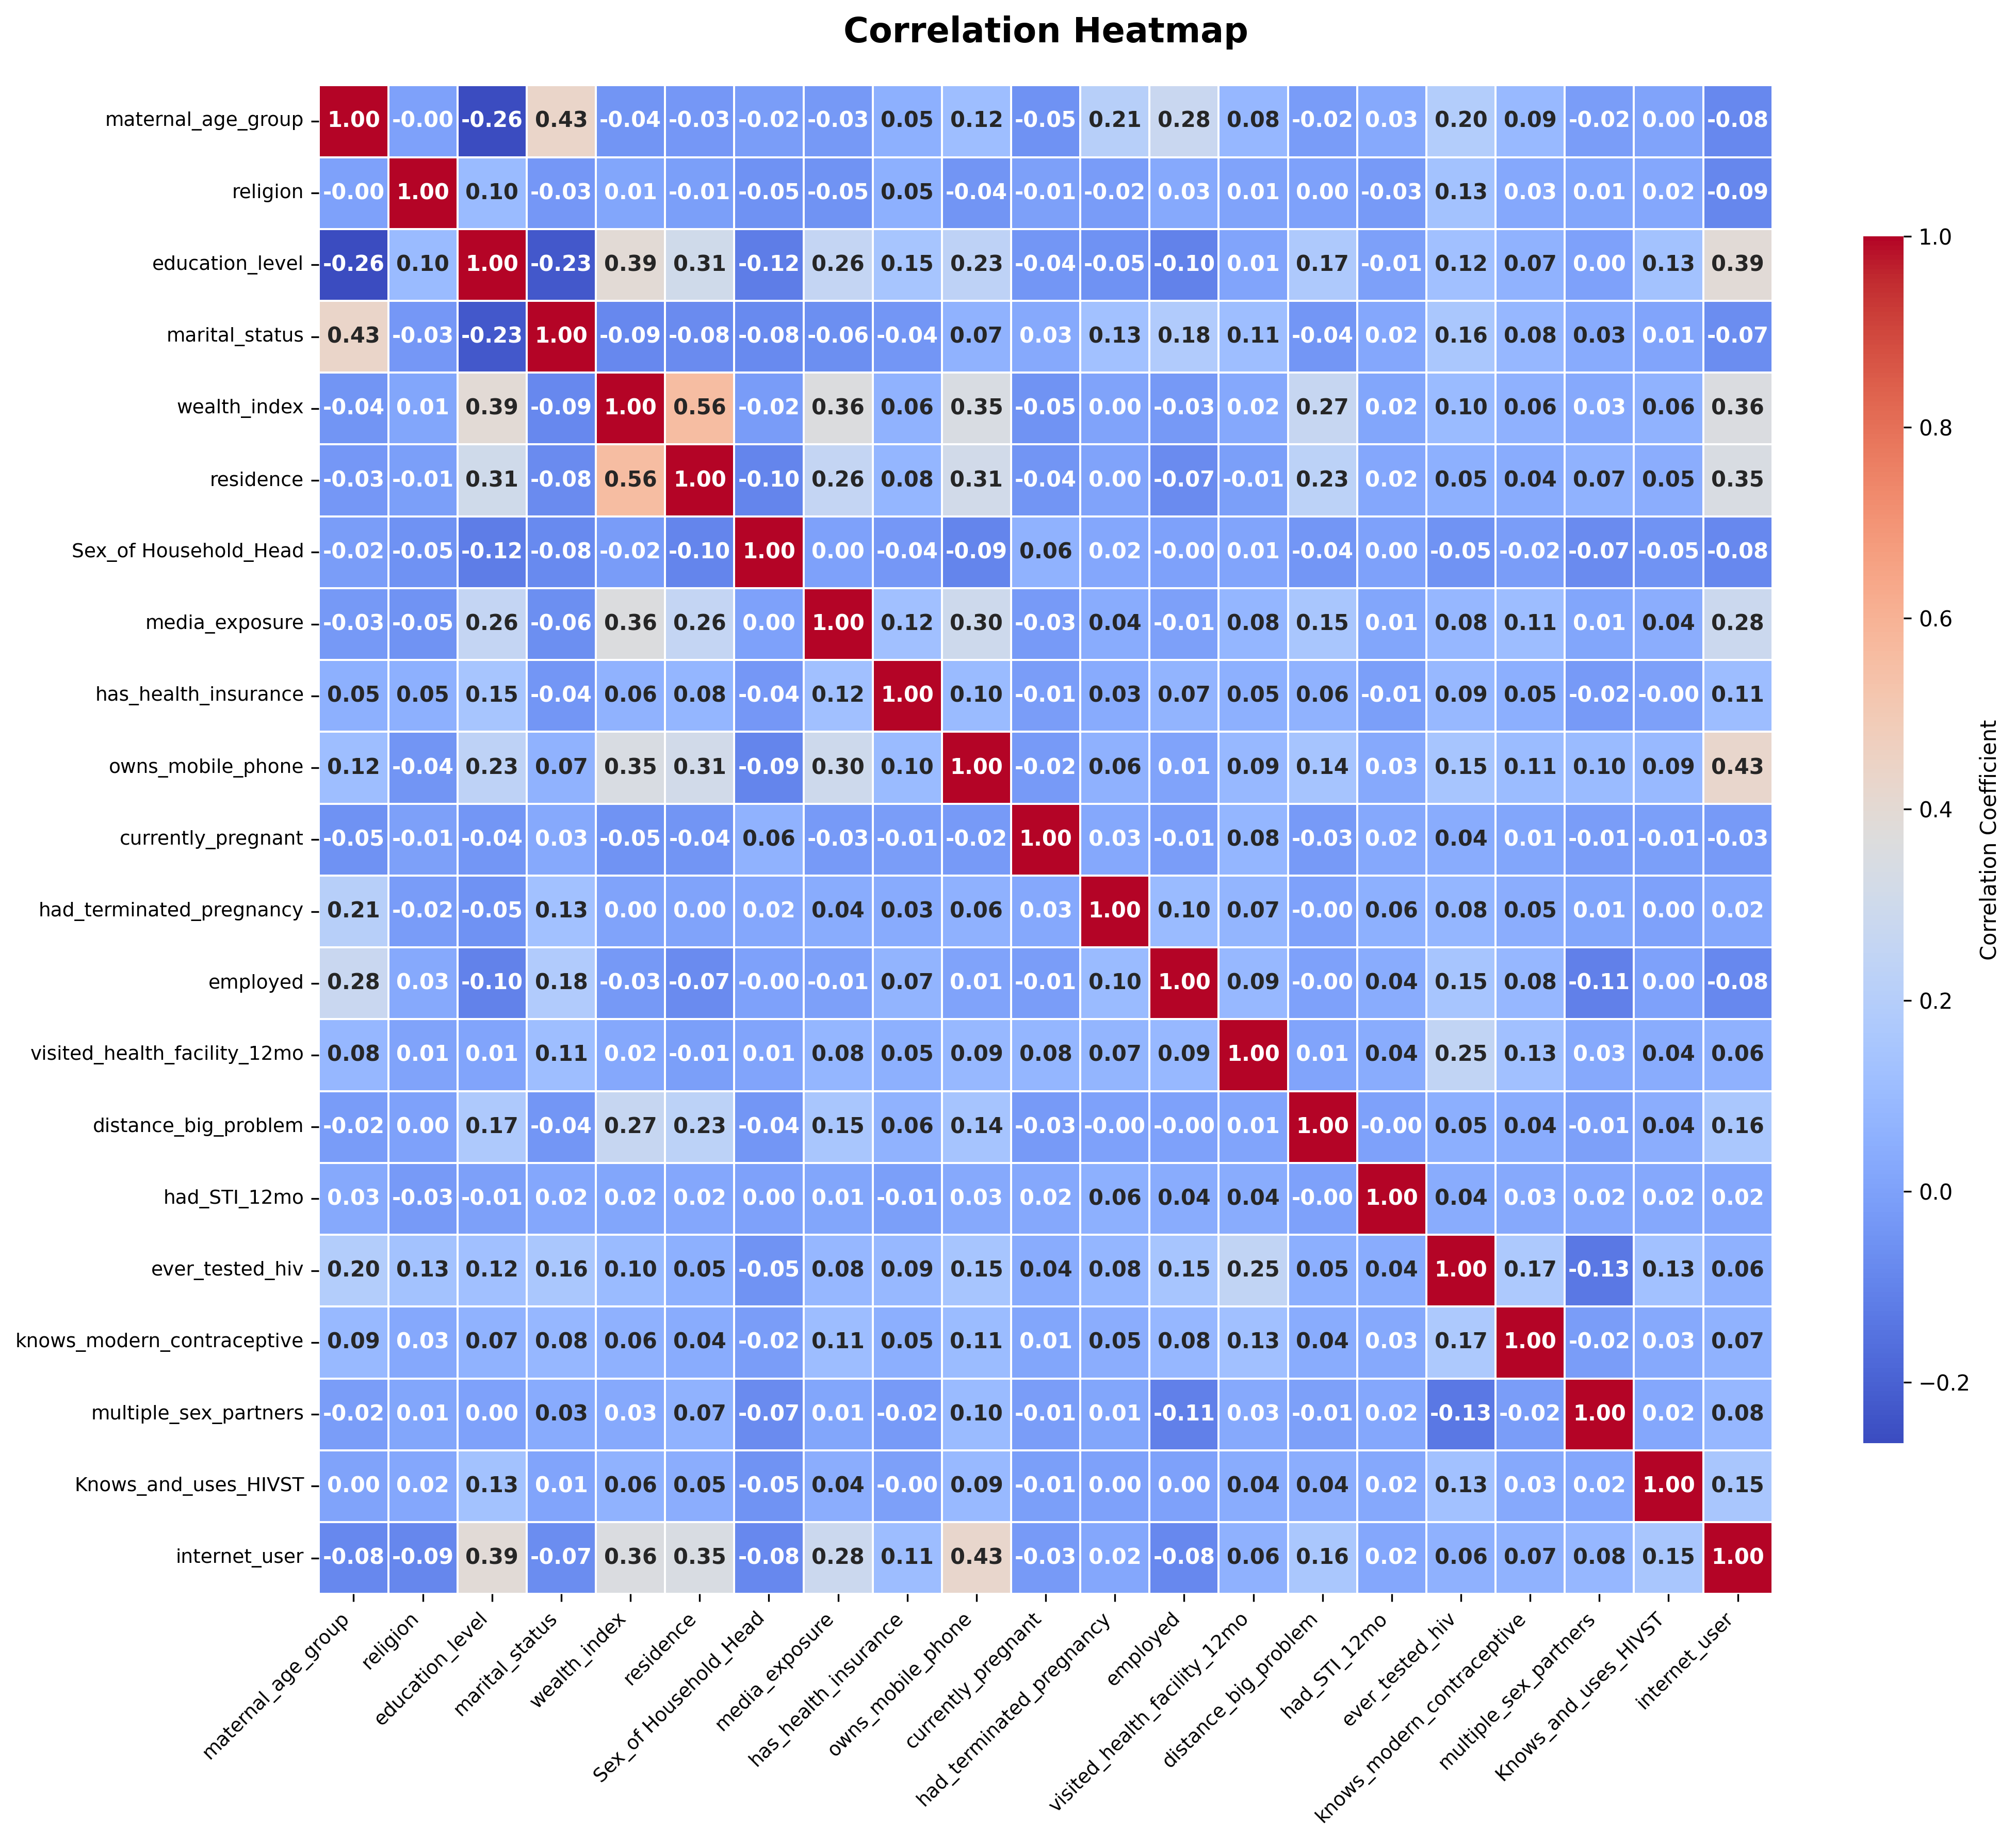

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_selected_encoded.corr()

# Set plot style and size
plt.figure(figsize=(14, 12), dpi=300)  # High resolution for publication-quality

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                     # show 2 decimal places
    cmap='coolwarm',               # balanced color scheme
    annot_kws={"size": 10, "weight": "bold"},
    linewidths=0.5,                # thin lines between cells
    cbar_kws={'shrink': 0.8, 'aspect': 30, 'label': 'Correlation Coefficient'}
)

# Title and labels
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Tight layout for better spacing
plt.tight_layout()

# Save the image (optional)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


In [47]:
from sklearn.model_selection import train_test_split

# Assuming 'Knows_and_uses_HIVST' is the target variable
X = df_selected_encoded.drop('Knows_and_uses_HIVST', axis=1)
y = df_selected_encoded['Knows_and_uses_HIVST']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Training features (X_train) shape:", X_train.shape)
print("Testing features (X_test) shape:", X_test.shape)
print("Training target (y_train) shape:", y_train.shape)
print("Testing target (y_test) shape:", y_test.shape)

display(X_train.head())
display(y_train.head())

Features (X) shape: (347757, 20)
Target (y) shape: (347757,)
Training features (X_train) shape: (278205, 20)
Testing features (X_test) shape: (69552, 20)
Training target (y_train) shape: (278205,)
Testing target (y_test) shape: (69552,)


,maternal_age_group,religion,education_level,marital_status,wealth_index,residence,Sex_of Household_Head,media_exposure,has_health_insurance,owns_mobile_phone,currently_pregnant,had_terminated_pregnancy,employed,visited_health_facility_12mo,distance_big_problem,had_STI_12mo,ever_tested_hiv,knows_modern_contraceptive,multiple_sex_partners,internet_user
291787,2,1,0,0,2,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0
318701,1,2,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0
147707,1,0,0,1,3,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0
349721,0,1,0,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,0,0
272498,0,0,2,1,2,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0


,Knows_and_uses_HIVST
291787,0
318701,0
147707,0
349721,0
272498,0


In [48]:
display(y.value_counts())

,count
Knows_and_uses_HIVST,
0,337992
1,9765


✅ Selected Features by RFE:


Index(['education_level', 'residence', 'Sex_of Household_Head',
       'media_exposure', 'has_health_insurance', 'owns_mobile_phone',
       'ever_tested_hiv', 'knows_modern_contraceptive',
       'multiple_sex_partners', 'internet_user'],
      dtype='object')


Shape of training data after RFE: (278205, 10)
Shape of testing data after RFE: (69552, 10)


,education_level,residence,Sex_of Household_Head,media_exposure,has_health_insurance,owns_mobile_phone,ever_tested_hiv,knows_modern_contraceptive,multiple_sex_partners,internet_user
291787,0,0,1,1,0,0,1,1,0,0
318701,0,0,1,1,0,0,1,1,0,0
147707,0,1,1,1,0,1,0,1,0,0
349721,0,0,1,1,0,0,1,1,0,0
272498,2,0,0,1,0,1,1,1,0,0


/tmp/ipython-input-3077175221.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3077175221.py:48: UserWarning: 
The palette list has fewer values (11) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


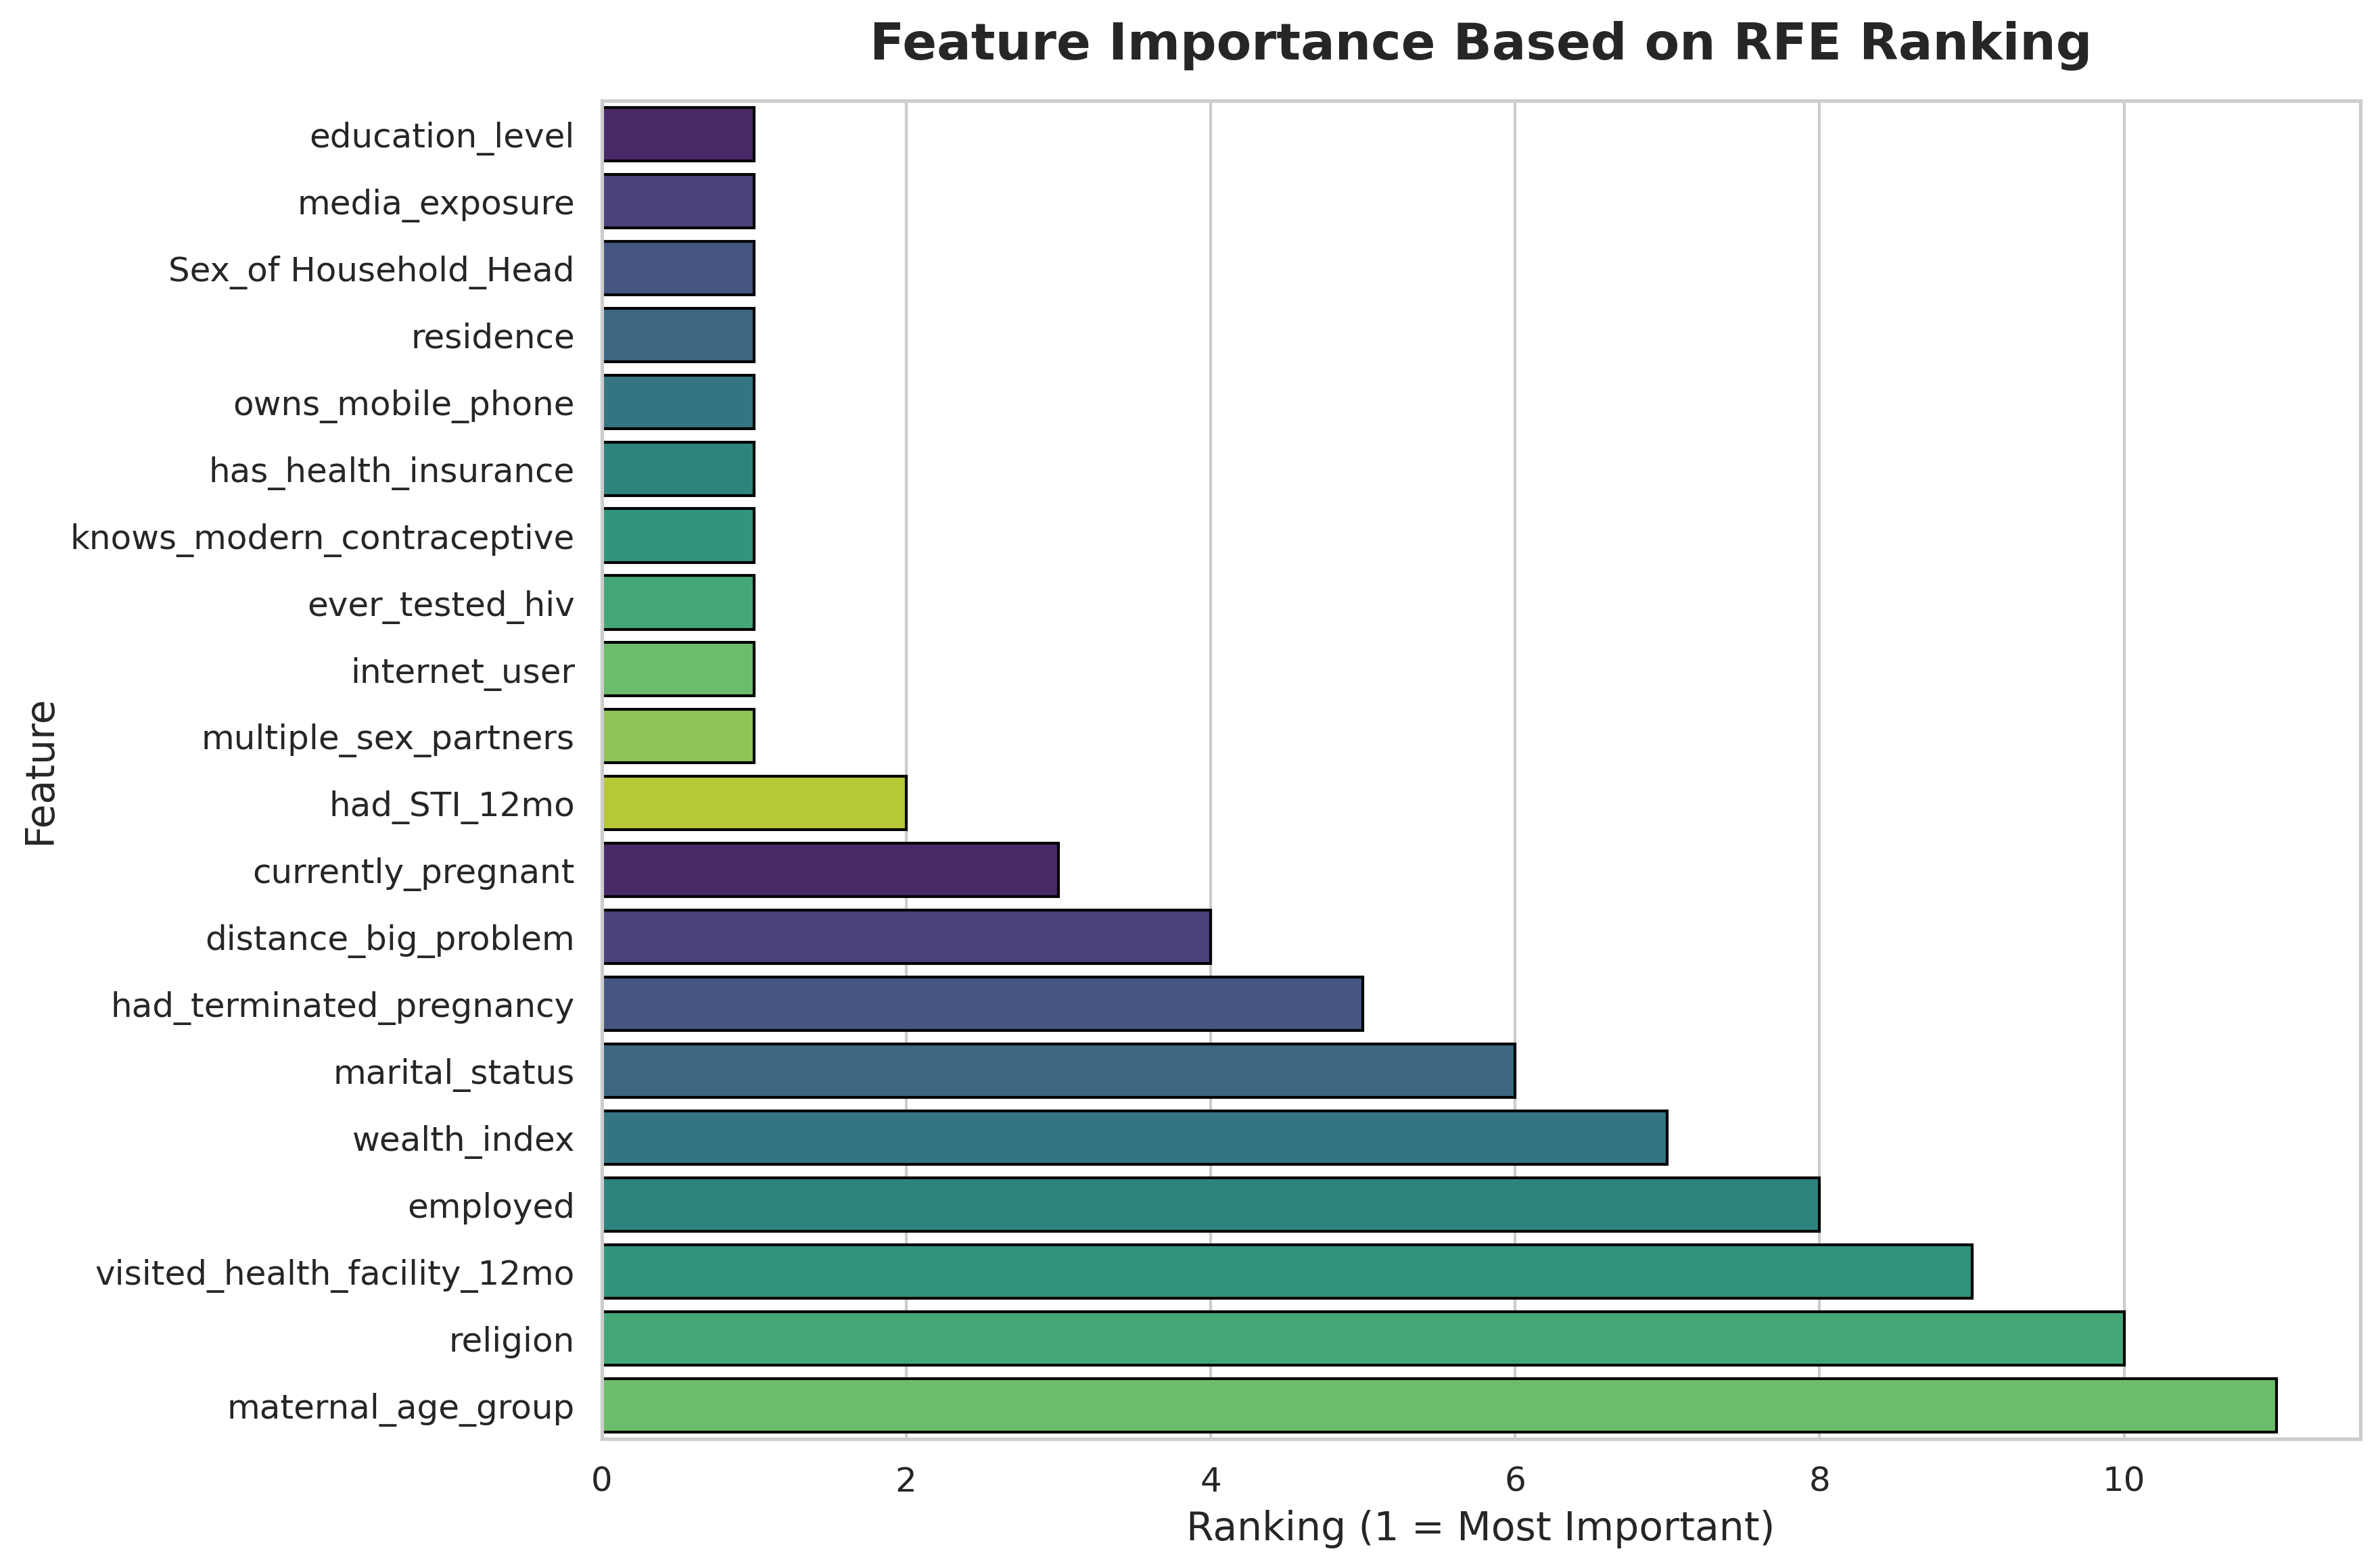

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the RFE selector with a Logistic Regression estimator
estimator = LogisticRegression(max_iter=1000, solver='liblinear')
rfe_selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features and their rankings
selected_features = X_train.columns[rfe_selector.support_]
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe_selector.ranking_
})

print("✅ Selected Features by RFE:")
display(selected_features)

# Use selected features for training and testing
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

print(f"\nShape of training data after RFE: {X_train_rfe.shape}")
print(f"Shape of testing data after RFE: {X_test_rfe.shape}")

display(X_train_rfe.head())

# ---- PLOT HIGH-QUALITY FEATURE RANKINGS ---- #

# Sort features by ranking (1 = most important)
feature_ranking_sorted = feature_ranking.sort_values(by='Ranking')

# Set style for professional look
sns.set_theme(style="whitegrid", font_scale=1.3)

# Create the figure (higher DPI for better quality)
plt.figure(figsize=(12, 8), dpi=300)

# Create color palette where rank 1 gets stronger color
palette = sns.color_palette("viridis", as_cmap=False, n_colors=feature_ranking_sorted['Ranking'].nunique())

# Barplot of features by ranking
sns.barplot(
    x='Ranking',
    y='Feature',
    data=feature_ranking_sorted,
    palette=palette,
    edgecolor='black'
)

# Titles and labels
plt.title('Feature Importance Based on RFE Ranking', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Ranking (1 = Most Important)', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Improve layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save high-quality image (optional)
plt.savefig("RFE_Feature_Importance.png", dpi=300, bbox_inches='tight')

plt.show()

Shape of training data after SMOTE: (540786, 10)


/tmp/ipython-input-3907159299.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=y_train, palette="crest", edgecolor="black", ax=axes[0])
/tmp/ipython-input-3907159299.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=y_train_resampled, palette="flare", edgecolor="black", ax=axes[1])


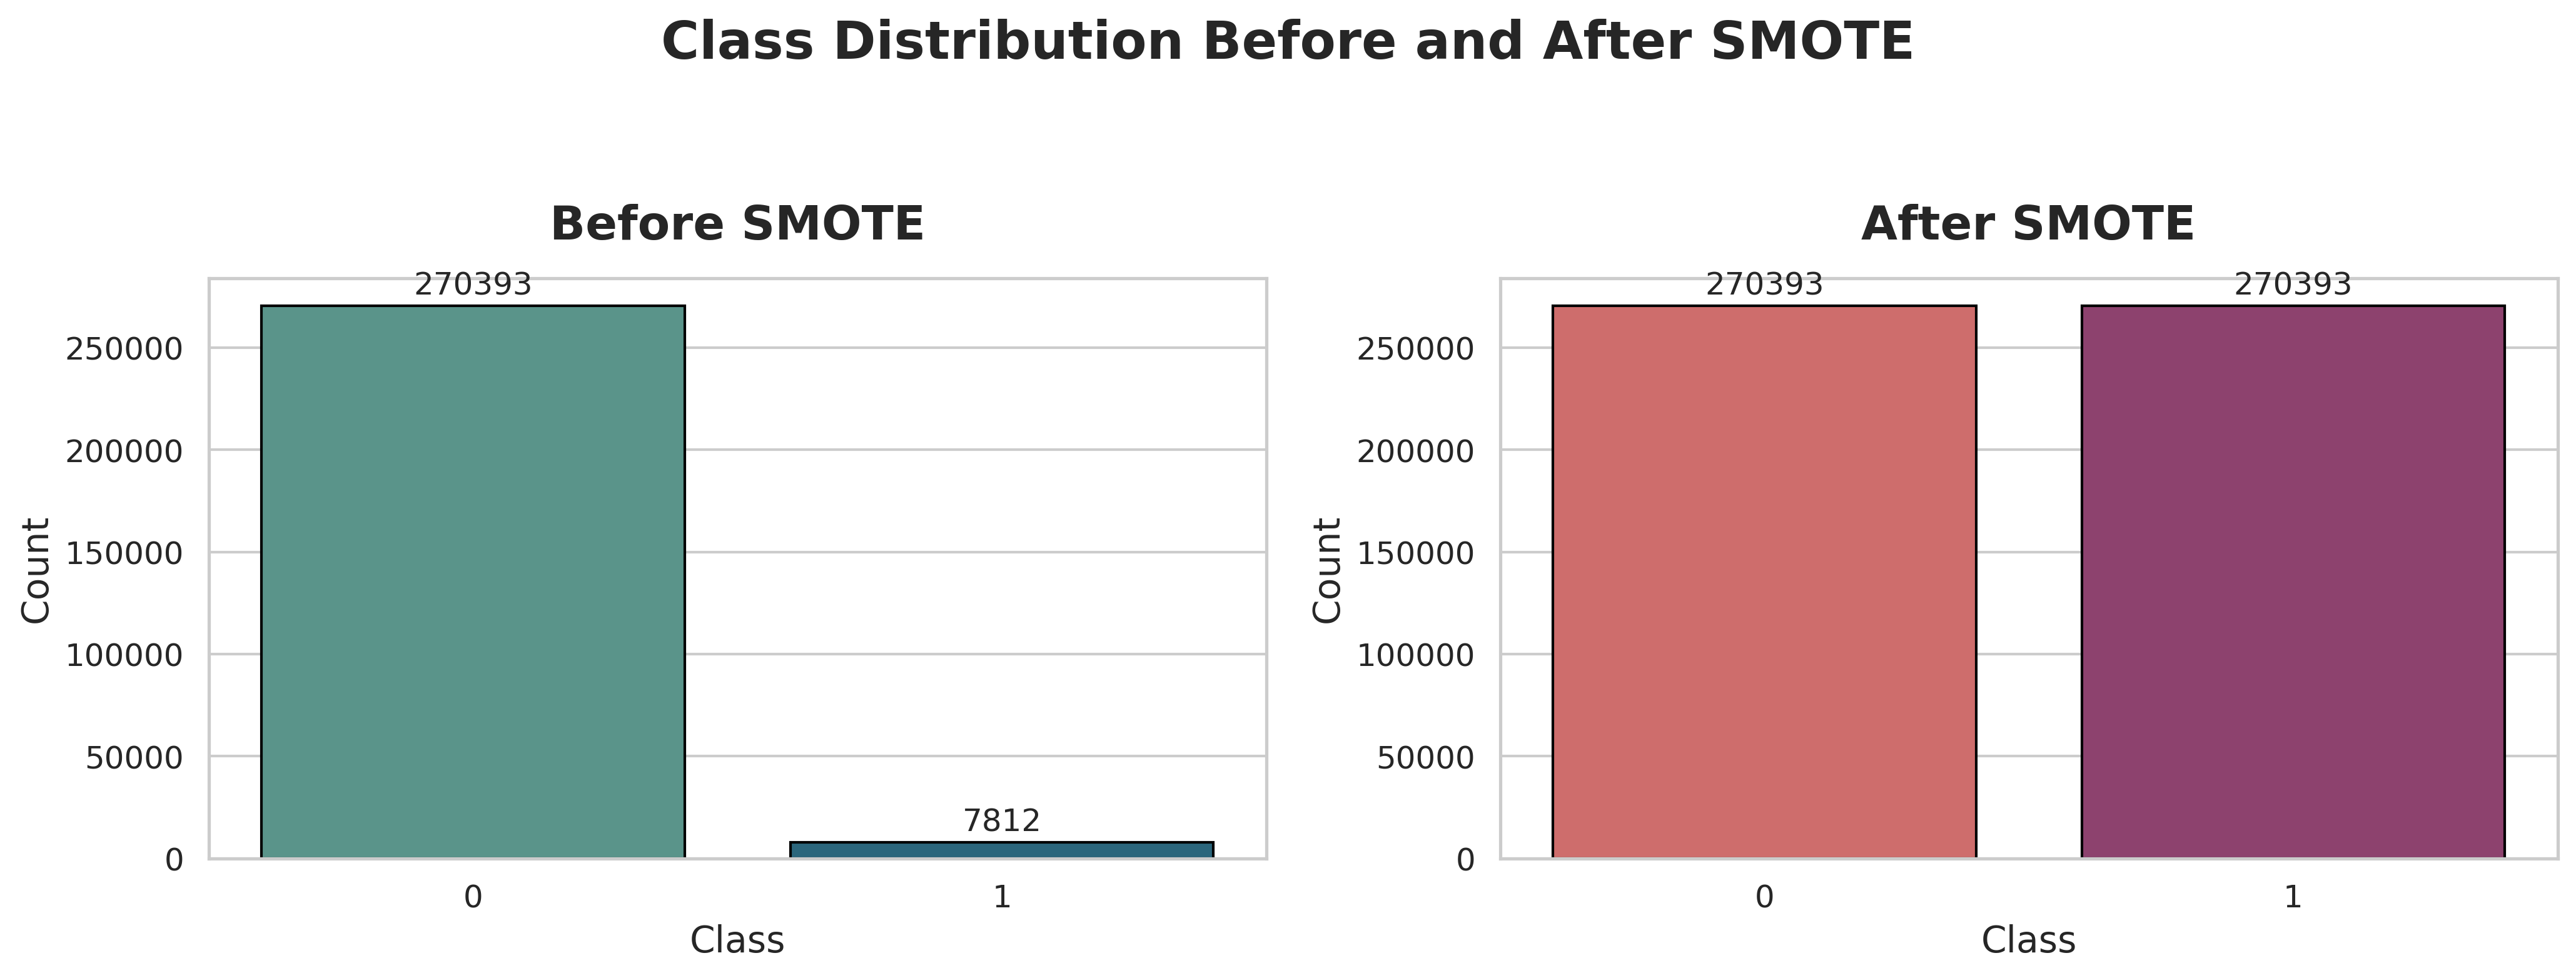

In [50]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.3)

# ----------------------------
# ⚙️ Apply SMOTE
# ----------------------------
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rfe, y_train)

print("Shape of training data after SMOTE:", X_train_resampled.shape)

# ----------------------------
# 🎨 Create Side-by-Side Plots (2×1)
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=300)

# --- Plot Before SMOTE ---
ax1 = sns.countplot(x=y_train, palette="crest", edgecolor="black", ax=axes[0])
ax1.set_title("Before SMOTE", fontsize=18, fontweight="bold", pad=15)
ax1.set_xlabel("Class", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=2)

# --- Plot After SMOTE ---
ax2 = sns.countplot(x=y_train_resampled, palette="flare", edgecolor="black", ax=axes[1])
ax2.set_title("After SMOTE", fontsize=18, fontweight="bold", pad=15)
ax2.set_xlabel("Class", fontsize=14)
ax2.set_ylabel("Count", fontsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=2)

# Adjust spacing and add main title
plt.suptitle("Class Distribution Before and After SMOTE", fontsize=20, fontweight="bold", y=1.05)
plt.tight_layout()

# Save high-resolution figure
plt.savefig("Class_Distribution_Before_After_SMOTE.png", dpi=300, bbox_inches="tight")

plt.show()


In [51]:
%pip install catboost -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [52]:
# =========================================
# ⚙️ Import Libraries
# =========================================
import numpy as np, pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    BaggingClassifier, VotingClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb, lightgbm as lgb, catboost as cb
import shap
import matplotlib.pyplot as plt

# =========================================
# 🚀 Define Models & Parameter Grids
# =========================================
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(verbose=0, random_state=42)
}

param_grids = {
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    "ExtraTrees": {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    "Bagging": {'n_estimators': [10, 50, 100]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "GradientBoosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    "XGBoost": {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]},
    "LightGBM": {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.05], 'num_leaves': [31, 50]},
    "CatBoost": {'iterations': [100, 300], 'learning_rate': [0.01, 0.05], 'depth': [3, 5]}
}

# =========================================
# 🧠 Train Models with RandomizedSearchCV
# =========================================
best_models, results = {}, []
for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    rs = RandomizedSearchCV(model, param_grids[name], n_iter=5, scoring='f1', cv=3, n_jobs=-1, random_state=42)
    rs.fit(X_train_resampled, y_train_resampled)
    best_models[name] = rs.best_estimator_

    y_pred = rs.predict(X_test_rfe)
    y_prob = rs.predict_proba(X_test_rfe)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# =========================================
# ⚖️ Voting Classifier (Combine Best Models)
# =========================================
estimators = [(name, best_models[name]) for name in ["RandomForest", "XGBoost", "LightGBM", "CatBoost"]]
voting = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting.fit(X_train_resampled, y_train_resampled)

y_pred_vote = voting.predict(X_test_rfe)
y_prob_vote = voting.predict_proba(X_test_rfe)[:, 1]

results.append({
    "Model": "VotingClassifier",
    "Accuracy": accuracy_score(y_test, y_pred_vote),
    "Precision": precision_score(y_test, y_pred_vote, zero_division=0),
    "Recall": recall_score(y_test, y_pred_vote, zero_division=0),
    "F1": f1_score(y_test, y_pred_vote, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_prob_vote)
})

# =========================================
# 📊 Summary of Evaluation Metrics
# =========================================
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
print("\n📈 Model Evaluation Summary:")
print(results_df.round(3))

# Save to CSV
results_df.to_csv("ensemble_model_evaluation_summary.csv", index=False)
print("\n✅ Results saved as 'ensemble_model_evaluation_summary.csv'")

# =========================================
# 🏆 Select Best Model for SHAP Analysis
# =========================================
best_model_name = results_df.iloc[0]["Model"]
best_model = best_models.get(best_model_name, voting)
print(f"\n🔥 Best Model: {best_model_name}")

# =========================================
# 📈 SHAP Values Analysis
# =========================================
explainer = shap.Explainer(best_model, X_test_rfe)
shap_values = explainer(X_test_rfe)

# SHAP summary bar plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_rfe, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance ({best_model_name})", fontsize=14)
plt.tight_layout()
plt.savefig("best_model_shap_bar.png", dpi=300)
plt.close()
print("📊 SHAP bar plot saved as 'best_model_shap_bar.png'")


🔹 Training RandomForest ...

🔹 Training ExtraTrees ...

🔹 Training Bagging ...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



🔹 Training AdaBoost ...

🔹 Training GradientBoosting ...

🔹 Training XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:17:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 Training LightGBM ...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 270393, number of negative: 270393
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 540786, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🔹 Training CatBoost ...

📈 Model Evaluation Summary:
              Model  Accuracy  Precision  Recall     F1  ROC-AUC
7          CatBoost     0.756      0.084   0.776  0.152    0.844
8  VotingClassifier     0.757      0.084   0.772  0.151    0.842
5           XGBoost     0.756      0.084   0.774  0.151    0.843
4  GradientBoosting     0.756      0.084   0.774  0.151    0.843
6          L

100%|===================| 69508/69552 [15:39<00:00]       

📊 SHAP bar plot saved as 'best_model_shap_bar.png'


In [54]:
# =========================================
# ⚙️ Import Libraries
# =========================================
import numpy as np, pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    BaggingClassifier, VotingClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, precision_recall_curve
)
from imblearn.over_sampling import SMOTE
import xgboost as xgb, lightgbm as lgb, catboost as cb
import shap
import matplotlib.pyplot as plt

# =========================================
# ⚖️ Balance Data (SMOTE) - Applied in previous step
# =========================================
# smote = SMOTE(random_state=42)
# X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
# print(f"✅ After SMOTE: {np.bincount(y_train_bal)}")

# =========================================
# 🚀 Define Models with Class Weights
# =========================================
models = {
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "ExtraTrees": ExtraTreesClassifier(class_weight='balanced', random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(
        # Use the ratio of the original imbalanced data for scale_pos_weight
        scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    "LightGBM": lgb.LGBMClassifier(class_weight='balanced', random_state=42),
    "CatBoost": cb.CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42)
}

param_grids = {
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    "ExtraTrees": {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    "Bagging": {'n_estimators': [10, 50, 100]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "GradientBoosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    "XGBoost": {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.05], 'max_depth': [3, 5]},
    "LightGBM": {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.05], 'num_leaves': [31, 50]},
    "CatBoost": {'iterations': [100, 300], 'learning_rate': [0.01, 0.05], 'depth': [3, 5]}
}

# =========================================
# 🧠 Train Models + Threshold Optimization
# =========================================
best_models, results = {}, []

for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    rs = RandomizedSearchCV(model, param_grids[name], n_iter=5, scoring='f1', cv=3, n_jobs=-1, random_state=42)
    # Use X_train_rfe and y_train_resampled for training
    rs.fit(X_train_resampled, y_train_resampled)
    best_models[name] = rs.best_estimator_

    # Use X_test_rfe for prediction
    y_prob = rs.predict_proba(X_test_rfe)[:, 1]

    # ---- Optimal threshold based on F1 ----
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]

    y_pred_opt = (y_prob >= best_threshold).astype(int)

    results.append({
        "Model": name,
        "Best_Threshold": round(best_threshold, 3),
        "Accuracy": accuracy_score(y_test, y_pred_opt),
        "Precision": precision_score(y_test, y_pred_opt, zero_division=0),
        "Recall": recall_score(y_test, y_pred_opt, zero_division=0),
        "F1": f1_score(y_test, y_pred_opt, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# =========================================
# ⚖️ Voting Classifier (Combine Top Models)
# =========================================
estimators = [(name, best_models[name]) for name in ["RandomForest", "XGBoost", "LightGBM", "CatBoost"]]
voting = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
# Use X_train_rfe and y_train_resampled for training
voting.fit(X_train_resampled, y_train_resampled)

# Use X_test_rfe for prediction
y_prob_vote = voting.predict_proba(X_test_rfe)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_vote)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_threshold_vote = thresholds[np.argmax(f1_scores)]
y_pred_vote_opt = (y_prob_vote >= best_threshold_vote).astype(int)

results.append({
    "Model": "VotingClassifier",
    "Best_Threshold": round(best_threshold_vote, 3),
    "Accuracy": accuracy_score(y_test, y_pred_vote_opt),
    "Precision": precision_score(y_test, y_pred_vote_opt, zero_division=0),
    "Recall": recall_score(y_test, y_pred_vote_opt, zero_division=0),
    "F1": f1_score(y_test, y_pred_vote_opt, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_prob_vote)
})

# =========================================
# 📊 Summary of Evaluation Metrics
# =========================================
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
print("\n📈 Model Evaluation Summary:")
display(results_df.round(3))

results_df.to_csv("ensemble_model_evaluation_summary_balanced.csv", index=False)
print("\n✅ Results saved as 'ensemble_model_evaluation_summary_balanced.csv'")

# =========================================
# 🏆 SHAP Analysis for Best Model
# =========================================
best_model_name = results_df.iloc[0]["Model"]
best_model = best_models.get(best_model_name, voting)
print(f"\n🔥 Best Model: {best_model_name}")

explainer = shap.Explainer(best_model, X_test_rfe)
shap_values = explainer(X_test_rfe)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_rfe, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance ({best_model_name})", fontsize=14)
plt.tight_layout()
plt.savefig("best_model_shap_bar_balanced.png", dpi=300)
plt.close()
print("📊 SHAP bar plot saved as 'best_model_shap_bar_balanced.png'")


🔹 Training RandomForest ...

🔹 Training ExtraTrees ...

🔹 Training Bagging ...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



🔹 Training AdaBoost ...

🔹 Training GradientBoosting ...

🔹 Training XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:20:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 Training LightGBM ...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 270393, number of negative: 270393
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 540786, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🔹 Training CatBoost ...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



📈 Model Evaluation Summary:


,Model,Best_Threshold,Accuracy,Precision,Recall,F1,ROC-AUC
5,XGBoost,0.994,0.931,0.176,0.394,0.244,0.842
6,LightGBM,0.824,0.929,0.173,0.404,0.242,0.840
8,VotingClassifier,0.868,0.930,0.172,0.392,0.239,0.841
7,CatBoost,0.821,0.928,0.170,0.401,0.239,0.844
4,GradientBoosting,0.817,0.925,0.167,0.419,0.239,0.843
0,RandomForest,0.818,0.922,0.165,0.436,0.239,0.837
1,ExtraTrees,0.817,0.922,0.165,0.436,0.239,0.837
2,Bagging,0.818,0.922,0.165,0.436,0.239,0.837
3,AdaBoost,0.605,0.912,0.155,0.477,0.234,0.839



✅ Results saved as 'ensemble_model_evaluation_summary_balanced.csv'

🔥 Best Model: XGBoost


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# =========================================
# 🏆 SHAP Analysis for Best Model
# =========================================
best_model_name = results_df.iloc[0]["Model"]
best_model = best_models.get(best_model_name, voting)
print(f"\n🔥 Best Model: {best_model_name}")

# Wrap the model's predict_proba in a lambda function to make it callable for SHAP
# Explicitly provide the masker with the test data
explainer = shap.Explainer(lambda x: best_model.predict_proba(pd.DataFrame(x, columns=X_test_rfe.columns))[:, 1], X_test_rfe, masker=X_test_rfe)
shap_values = explainer(X_test_rfe)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_rfe, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance ({best_model_name})", fontsize=14)
plt.tight_layout()
plt.savefig("best_model_shap_bar_balanced.png", dpi=300)
plt.close()
print("📊 SHAP bar plot saved as 'best_model_shap_bar_balanced.png'")


🔥 Best Model: XGBoost


ExactExplainer explainer:  90%|████████▉ | 62536/69552 [4:24:37<22:23,  5.22it/s]